In [11]:
import sys
from pathlib import Path

project_root = Path.cwd().parent
sys.path.append(str(project_root))

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.typing import NDArray
from typing import Callable

from src.fem_solver import solve_bvp
from src.mesh import Mesh
from src.assembly import assemble

In [13]:
def rhs_function(a: float, xb: float) -> Callable[[NDArray[np.float64]], NDArray[np.float64]]:
    def f(x: NDArray[np.float64]) -> NDArray[np.float64]:
        b = x - xb
        numerator = 2 * (a + a**3 * b * (b - x + 1))
        denominator = (a**2 * b**2 + 1)**2
        return numerator / denominator

    return f

def analytic_solution(a: float, xb: float) -> Callable[[NDArray[np.float64]], NDArray[np.float64]]:
    def f(x: NDArray[np.float64]) -> NDArray[np.float64]:
        b = x - xb
        return (1 - x) * (np.atan(a * b) + np.atan(a * xb))
    
    return f

In [17]:
mesh = Mesh(1.0, 2, 3)
K, F = assemble(mesh, rhs_function(5, 0.8), 3)
print("F =", F)
print("max(|F|) =", np.max(np.abs(F)))

F = [ 0.00385402 -0.02666238 -0.00514409  0.07946306 -0.13265448 -0.05480141
  0.05884762]
max(|F|) = 0.1326544777844534


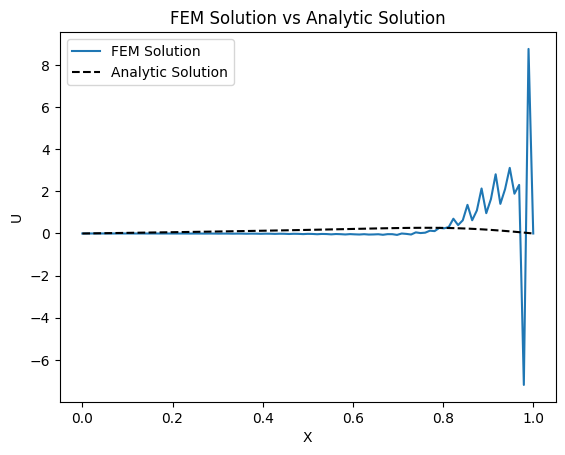

In [18]:
a = 5
xb = 4 / 5

p = 3

L = 1.0
nel = 32

nodes, U = solve_bvp(L, nel, p, rhs=rhs_function(a, xb))
x = np.linspace(0, L, 100)

plt.plot(nodes, U, label='FEM Solution')
plt.plot(x, analytic_solution(a, xb)(x), linestyle='--', color='black', label='Analytic Solution')
plt.title('FEM Solution vs Analytic Solution')
plt.legend()
plt.xlabel('X')
plt.ylabel('U')
plt.show()